In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
np.random.seed(0)

df = pd.read_csv('D:/SMU/Data Analytics/Datasets/website_phishing.csv')

df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [15]:
#assigning the x and y variables
x = df.drop('Result',axis=1)
y = df['Result']

#converting the y data
label_mapping = {1:'legitimate',0:'suspicious',-1:'phishing'}
y = y.map(label_mapping)
y = np.array(y)

In [16]:
#create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [17]:
#Creating a random forest classifier
clf = RandomForestClassifier(n_jobs=2,random_state=0)

In [18]:
#Fit the model
clf.fit(x_test, y_test)

RandomForestClassifier(n_jobs=2, random_state=0)

In [19]:
#Applying trained classifier to the test
clf.predict(x_test)

array(['phishing', 'phishing', 'phishing', ..., 'phishing', 'legitimate',
       'phishing'], dtype=object)

In [20]:
#Viewing the predicted probabilities of the first 10 observations
clf.predict_proba(x_test)[0:10]

array([[0.01, 0.99],
       [0.  , 1.  ],
       [0.35, 0.65],
       [0.02, 0.98],
       [0.96, 0.04],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ]])

In [21]:
#Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,clf.predict(x_test))
print('accuracy_score on test dataset: ', accuracy_test)

accuracy_score on test dataset:  1.0


                                index  having_IPhaving_IP_Address  \
index                        1.000000                   -0.388317   
having_IPhaving_IP_Address  -0.388317                    1.000000   
URLURL_Length                0.006105                   -0.052411   
Shortining_Service          -0.006281                    0.403461   
having_At_Symbol            -0.169478                    0.158699   
double_slash_redirecting    -0.003363                    0.397389   
Prefix_Suffix               -0.007340                   -0.005257   
having_Sub_Domain            0.234091                   -0.080745   
SSLfinal_State              -0.006682                    0.071414   
Domain_registeration_length -0.001180                   -0.022739   
Favicon                      0.007293                    0.087025   
port                         0.001656                    0.060979   
HTTPS_token                  0.002916                    0.363534   
Request_URL                 -0.000

<AxesSubplot:>

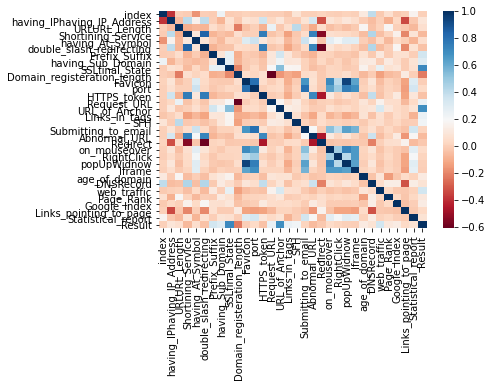

In [22]:
#print correlation matrix
corr = df.corr()
print(corr)

#plot correlation matrix
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")